In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf


# **Q8 - Reading Data :**

In [2]:
auto=pd.read_csv("../data/Auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


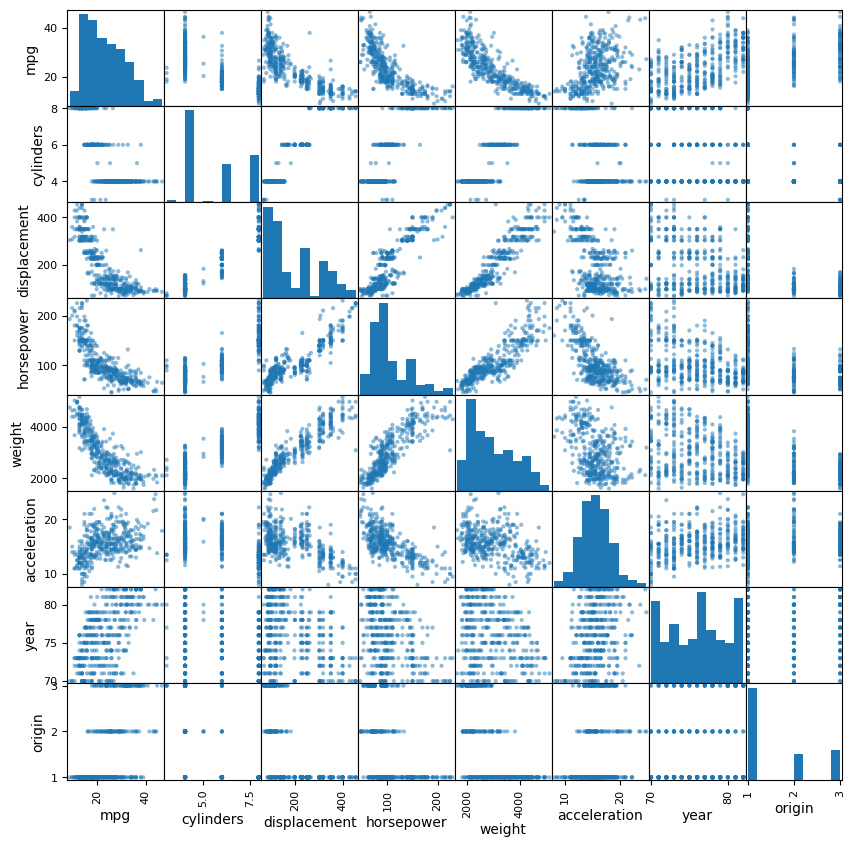

In [3]:
# scatter matrix
scatter_matrix(auto, figsize=(10, 10))
plt.show()


In [4]:
#use smf.ols to fit a linear model on horsepower
model = smf.ols('mpg ~ horsepower', data=auto)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        10:58:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [5]:
#predict mpg for a car with horsepower 98
new_data = pd.DataFrame({'horsepower': [98]})
model.predict(new_data)


0    24.467077
dtype: float64

In [6]:
# get the 95% confidence interval for the coefficients
model.conf_int(alpha=0.05)



,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [7]:
#use smf.ols to fit a linear model on horsepower, with a new term 100/horsepower
auto['new_term'] = 150/auto['horsepower']
model = smf.ols('mpg ~ horsepower + new_term', data=auto)
model = model.fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     398.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           7.83e-95
Time:                        11:17:19   Log-Likelihood:                -1142.8
No. Observations:                 392   AIC:                             2292.
Df Residuals:                     389   BIC:                             2304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4787      3.288      3.491      0.0

In [8]:
#do a full regression on all the variables, with origin being a categorical variable, use the C() function to indicate that
model = smf.ols('mpg ~ C(origin) + cylinders + displacement + horsepower + weight + acceleration + year', data=auto)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.79e-139
Time:                        11:17:23   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.

In [10]:
#remove the precictors that aren't significant and recaluclate the model
model_small = smf.ols('mpg ~ C(origin) + displacement + weight + year', data=auto)
model_small = model_small.fit()
print(model_small.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     353.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.40e-141
Time:                        11:26:04   Log-Likelihood:                -1024.4
No. Observations:                 392   AIC:                             2061.
Df Residuals:                     386   BIC:                             2085.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.5949      4.064     -4.

In [11]:
#write out the linear euqation for the small model using the coefficients
print(model_small.params)
print("mpg =  " + str(model_small.params[0]) + " + " + str(model_small.params[1]) + "*origin_1 + " + str(model_small.params[2]) + "*origin_2 + " + str(model_small.params[3]) + "*displacement + " + str(model_small.params[4]) + "*weight + " + str(model_small.params[5]) + "*year")


Intercept        -19.594921
C(origin)[T.2]     2.383049
C(origin)[T.3]     2.438080
displacement       0.009321
weight            -0.006820
year               0.797991
dtype: float64
mpg =  -19.594921301222826 + 2.383048517073635*origin_1 + 2.4380795907367148*origin_2 + 0.009321202643609123*displacement + -0.006819980456901622*weight + 0.7979908413719798*year
